# Curse of Dimensionality
## _examplified with Monte Carlo estimation_

The curse of dimensionality discribes the increaseing amount of samples needed to explore a space when increasing the dimensions of that space.

this can be visualized using a sphere and a line of twice the radius attached to the center - defining slice. computing the volume of such a slice caputred inside the sphere and outside of it shows the increasingly small ratio the sphere has in the entire space.

here, the _curse of dimensionality_ is visualized by defining a hypersphere inside a hypercube with unit side lengths, centered at the origin. 

As the hypercube will have a volume of $1$ the ratio of samples inside the sphere can be interpreted as the _probability_ of a sample falling inside the hypersphere.

using simple Monte Carlo estimation, the draw backs of this tecnique shall be emphasized in higher dimensions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining the paramters 
data_points_per_dim = int(1E6)
max_dimension = 10

In [3]:
def run_experiment(data_points_per_dim, max_dimension):
    """Samples uniformly and returns the ratio of samples inside the unit sphere.
    
    :param data_points_per_dim: samples per dimension
    :param max_dimension: largest dimension to run the experiment for 
    :returns: the ratio of samples inside the sphere per dimension
    """
    
    # save the ratio of samples inside the sphere per dim
    ratio_inside_sphere = np.zeros((2, max_dimension))
    
    for dimension in range(max_dimension):
        # sample random points in space inside [-.5, .5]
        samples = np.random.rand(data_points_per_dim, dimension+1) - .5
        samples_distances = np.linalg.norm(samples, axis=1)
        assert samples_distances.shape[0] == data_points_per_dim

        # compute amound of samples inside the sphere, 
        # i.e. norm less than radius; the MC step 
        samples_inside_sphere = np.sum(samples_distances < .5)
        ratio_inside_sphere[0, dimension] = dimension + 1
        ratio_inside_sphere[1, dimension] = samples_inside_sphere / data_points_per_dim

    return ratio_inside_sphere

In [7]:
def plot_results(ratios_inside_sphere, n_samples):
    """Plots the ratios per dimension. """
    plt.figure(figsize=(12, 8))
    for idx, ratio_inside_sphere in enumerate(ratios_inside_sphere):
        plt.plot(ratio_inside_sphere[0], ratio_inside_sphere[1], "-k")
        plt.plot(ratio_inside_sphere[0], ratio_inside_sphere[1], "o", 
                 label=f"ratio {n_samples[idx]} points")
    plt.legend()
    plt.grid()
    plt.title("Ratio of samples inside the sphere per dim.", fontsize=24)
    plt.xlabel("Dimension", fontsize=14)
    plt.ylabel("Ratio samples inside sphere", fontsize=14)
#     plt.savefig("./output/ratio_samples_in_sphere.png", dpi=300, 
#                 transparent=True)
    plt.show();

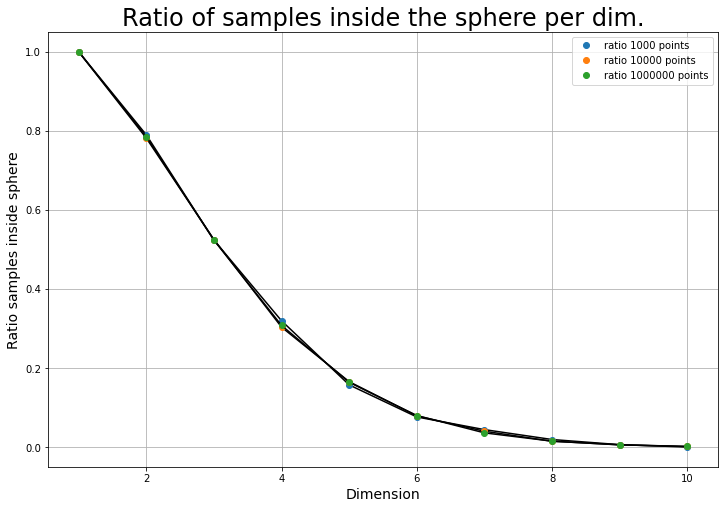

In [8]:
ratio = [run_experiment(int(1E3), 10), run_experiment(int(1E4), 10), 
         run_experiment(int(10E6), 10)]
plot_results(ratio, [int(1E3), int(1E4), int(1E6)])

## Visualizing the samples in 3D

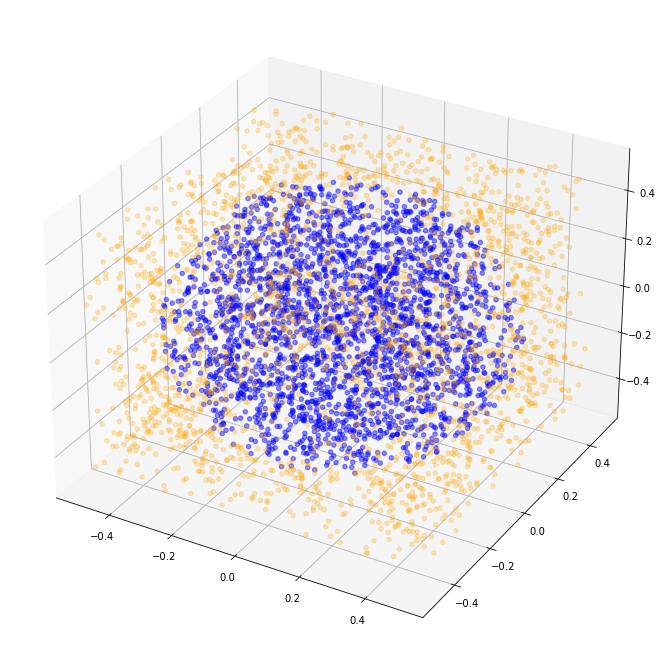

In [14]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

# sample data in 3D cube
samples = np.random.rand(5000, 3) - .5

# selecting the samples via logical indexing
samples_inside = np.linalg.norm(samples, axis = 1) <= .5
samples_inside = samples[samples_inside, :]

samples_outside = np.linalg.norm(samples, axis = 1) > .5
samples_outside = samples[samples_outside, :]

ax.scatter3D(samples_inside[:, 0], samples_inside[:, 1], 
             samples_inside[:, 2], color="blue", alpha=0.45)
ax.scatter3D(samples_outside[:, 0], samples_outside[:, 1], 
             samples_outside[:, 2], color="orange", alpha=0.25)

plt.savefig("./outputs/illustration_of_samples_in_sphere.png", dpi=300, bbox_inches="tight")